In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Base functions

In [58]:
NB_POINTS = 800

def axes(set_points):
    
    x_axe = set_points[:,0]
    y_axe = set_points[:,1]

    return x_axe , y_axe

def degree_membership(set_points):
    
    functions = []
    
    x_axe , y_axe = axes(set_points)
    
    for i_y in range(len(y_axe)-1):
        alpha = (y_axe[i_y] - y_axe[i_y+1]) / (x_axe[i_y] - x_axe[i_y+1])
        beta = y_axe[i_y] - alpha*x_axe[i_y]
        functions.append((alpha,beta))
        
    return np.array(functions)

def point_membership(set_points,point):
    
    functions = degree_membership(set_points)
    
    x_axe , y_axe = axes(set_points)
    if len(np.where(point < x_axe)[0]) == 0:
        return 0

    alpha , beta = functions[np.where(point < x_axe)[0][0]-1]

    return alpha*point + beta


def display_membership(functions,x_axe,name):
    
    for i_func in range(len(functions)):
        
        x = np.linspace(x_axe[i_func] , x_axe[i_func+1],NB_POINTS) 
        line = functions[i_func][0] *x + functions[i_func][1]
        plt.scatter(x,line,color='green',s=0.5)
        
    plt.title(name)
    plt.show()
    
def complementary(set_points):
    
    compl = []
    
    for (point,degree) in set_points:
        compl.append((point , 1 - degree))
        
    return np.array(compl)


def get_values(x,y,t_norme):
    return [t_norme.calculate(a,b) for a,b in zip(x,y)]

### Triangular sef

f(6) = 0


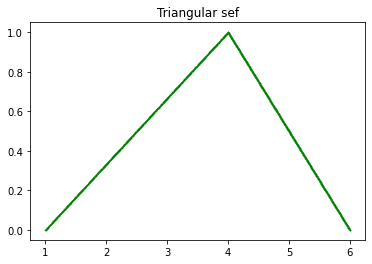

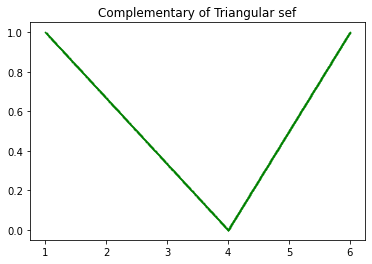

In [3]:
# define a set of points
sef_triangular = np.array([(1,0) , (4,1) , (6,0)])

point = 6
sef_triangular_x_axe = sef_triangular[:,0]

# get the function to calculate the degree
functions = degree_membership(sef_triangular)
# get the degree at a point 
deg_point = point_membership(sef_triangular,point)
print(f"f({point}) = {deg_point}")

# get the complentary of the function
sef_triangular_compl = complementary(sef_triangular)
functions_compl = degree_membership(sef_triangular_compl)
sef_triangular_comp_x_axe = sef_triangular_compl[:,0]

# display to see the function of degree membership
display_membership(functions,sef_triangular_x_axe,'Triangular sef')

# display to see the complenmatary function of degree membership
display_membership(functions_compl,sef_triangular_comp_x_axe,'Complementary of Triangular sef')

### Trapzoidal sef

f(6) = 1.0


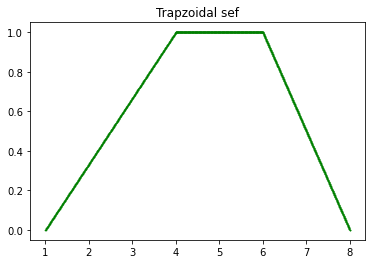

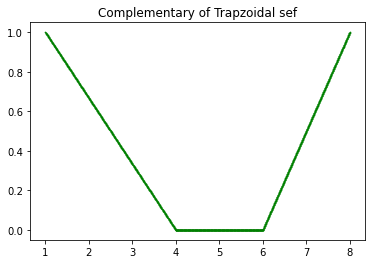

In [4]:
# define a set of points
sef_trapzoidal = np.array([(1,0) , (4,1) , (6,1),(8,0)])

point = 6
sef_trapzoidal_x_axe = sef_trapzoidal[:,0]

# get the function to calculate the degree
functions = degree_membership(sef_trapzoidal)
# get the degree at a point 
deg_point = point_membership(sef_trapzoidal,point)
print(f"f({point}) = {deg_point}")

# get the complentary of the function
sef_trapzoidal_compl = complementary(sef_trapzoidal)
functions_compl = degree_membership(sef_trapzoidal_compl)
sef_trapzoidal_comp_x_axe = sef_trapzoidal_compl[:,0]

# display to see the function of degree membership
display_membership(functions,sef_trapzoidal_x_axe,'Trapzoidal sef')

# display to see the complenmatary function of degree membership
display_membership(functions_compl,sef_trapzoidal_comp_x_axe,'Complementary of Trapzoidal sef')

### Random sef

f(1) = 0.0


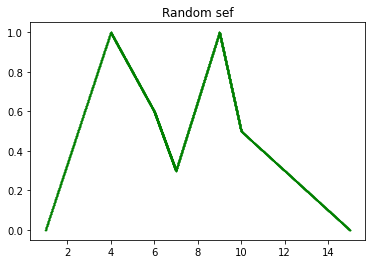

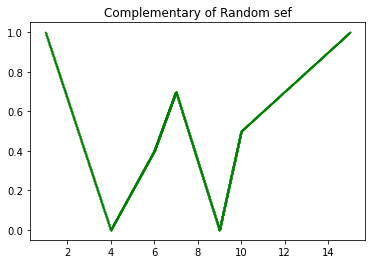

In [5]:
# define a set of points
sef_random = np.array([(1,0) , (4,1) , (6,0.6),(7,0.3),(9,1),(10,0.5),(15,0)])

point = 1
sef_random_x_axe = sef_random[:,0]

# get the function to calculate the degree
functions = degree_membership(sef_random)
# get the degree at a point 
deg_point = point_membership(sef_random,point)
print(f"f({point}) = {deg_point}")

# get the complentary of the function
sef_random_compl = complementary(sef_random)
functions_compl = degree_membership(sef_random_compl)
sef_random_comp_x_axe = sef_random_compl[:,0]

# display to see the function of degree membership
display_membership(functions,sef_random_x_axe,'Random sef')

# display to see the complenmatary function of degree membership
display_membership(functions_compl,sef_random_comp_x_axe,'Complementary of Random sef')

## T-norme & T-conorme

In [6]:
class T_norme():
    
    def __init__(self,name):
        self.name = name
        
    def calculate(self,x,y):
        assert x >= 0 and x <= 1 and y >= 0 and y <= 1 , "x and y must be in [0,1]"

class TN_Probabilist(T_norme):
    
    def __init__(self,name):
        super().__init__(name)
        
    def calculate(self,x,y):
        super().calculate(x,y)
        
        return x*y
    
class TN_Lukasiewicz(T_norme):
    
    def __init__(self,name):
        super().__init__(name)
        
    def calculate(self,x,y):
        super().calculate(x,y)
        return np.maximum(x+y-1 , 0)
    
    
class TN_Zadeh(T_norme):
    
    def __init__(self,name):
        super().__init__(name)
        
    def calculate(self,x,y):
        super().calculate(x,y)
        
        return np.minimum(x,y)
    
    
class TN_Hamacher_product(T_norme):
    
    def __init__(self,name):
        super().__init__(name)
        
    def calculate(self,x,y):
        super().calculate(x,y)
        
        if x == y == 0 : 
            return 0
        
        return (x*y) / (x+y-x*y) 
    
    
class TN_Drastic(T_norme):
    
    def __init__(self,name):
        super().__init__(name)
        
    def calculate(self,x,y):
        super().calculate(x,y)
        
        if x == 1:
            return y
        
        if y == 1:
            return x
    
        return 0

In [7]:
class T_conorme():
    
    def __init__(self,name):
        self.name = name
        
    def calculate(self,x,y):
        assert x >= 0 and x <= 1 and y >= 0 and y <= 1 , "x and y must be in [0,1]"

    
class TC_Probabilist(T_conorme):
    
    def __init__(self,name):
        super().__init__(name)
        
    def calculate(self,x,y):
        super().calculate(x,y)
        
        return x + y -x*y
    
    
class TC_Lukasiewicz(T_conorme):
    
    def __init__(self,name):
        super().__init__(name)
        
    def calculate(self,x,y):
        super().calculate(x,y)
        
        return np.minimum(x+y,1)
    
    
class TC_Zadeh(T_conorme):
    
    def __init__(self,name):
        super().__init__(name)
        
    def calculate(self,x,y):
        super().calculate(x,y)

        return np.maximum(x,y)
    
    
class TC_Hamacher_product(T_conorme):
    
    def __init__(self,name):
        super().__init__(name)
        
    def calculate(self,x,y):
        super().calculate(x,y)
        
        if x == y == 0 : 
            return 0
        
        return(x+y) / (1+x*y)
    
    
class TC_Drastic(T_conorme):
    
    def __init__(self,name):
        super().__init__(name)
        
    def calculate(self,x,y):
        super().calculate(x,y)
        
        if x == 0:
            return y
        
        if y == 0:
            return x
    
        return 1

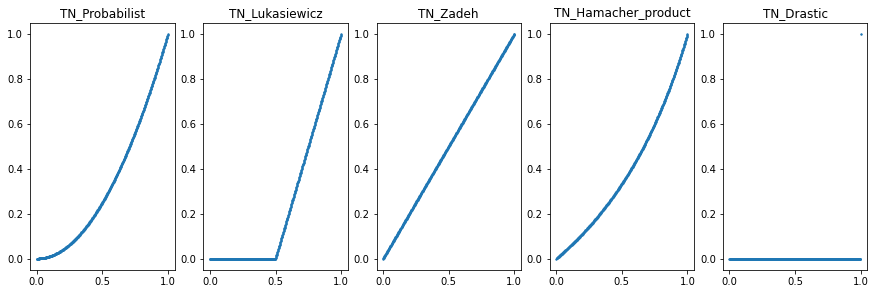

In [16]:
t_norme_P = TN_Probabilist("Probabilist")
t_norme_L = TN_Lukasiewicz("Lukasiewicz")
t_norme_Z = TN_Zadeh("Zadeh")
t_norme_H = TN_Hamacher_product("Hamacher_product")
t_norme_D = TN_Drastic("Drastic")

x = np.linspace(0,1,NB_POINTS) 
y = np.linspace(0,1,NB_POINTS)

plt.figure(figsize=(15,10))

plt.subplot(251)
plt.title("TN_Probabilist")
plt.scatter(x,get_values(x,y,t_norme_P),s=2.0)

plt.subplot(252)
plt.title("TN_Lukasiewicz")
plt.scatter(x,get_values(x,y,t_norme_L),s=2.0)

plt.subplot(253)
plt.title("TN_Zadeh")
plt.scatter(x,get_values(x,y,t_norme_Z),s=2.0)

plt.subplot(254)
plt.title("TN_Hamacher_product")
plt.scatter(x,get_values(x,y,t_norme_H),s=2.0)

plt.subplot(255)
plt.title("TN_Drastic")
plt.scatter(x,get_values(x,y,t_norme_D),s=2.0)

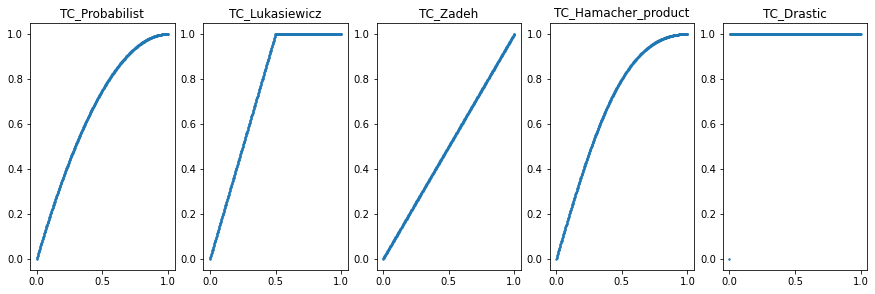

In [17]:
t_conorme_P = TC_Probabilist("Probabilist")
t_conorme_L = TC_Lukasiewicz("Lukasiewicz")
t_conorme_Z = TC_Zadeh("Zadeh")
t_conorme_H = TC_Hamacher_product("Hamacher_product")
t_conorme_D = TC_Drastic("Drastic")

plt.figure(figsize=(15,10))

plt.subplot(251)
plt.title("TC_Probabilist")
plt.scatter(x,get_values(x,y,t_conorme_P),s=2.0)

plt.subplot(252)
plt.title("TC_Lukasiewicz")
plt.scatter(x,get_values(x,y,t_conorme_L),s=2.0)

plt.subplot(253)
plt.title("TC_Zadeh")
plt.scatter(x,get_values(x,y,t_conorme_Z),s=2.0)

plt.subplot(254)
plt.title("TC_Hamacher_product")
plt.scatter(x,get_values(x,y,t_conorme_H),s=2.0)

plt.subplot(255)
plt.title("TC_Drastic")
plt.scatter(x,get_values(x,y,t_conorme_D),s=2.0)

## Operations

In [22]:
def operation(norme,set_A,set_B):
    
    inter = []

    born_inf , born_sup = np.minimum(np.min(set_A[:,0]),np.min(set_B[:,0])), np.maximum(np.max(set_A[:,0]),np.max(set_B[:,0]))
    space = np.linspace(born_inf , born_sup,NB_POINTS)
    
    for point in space:
        
        f_A = point_membership(set_A,point)
        f_B = point_membership(set_B,point)
        inter.append(norme.calculate(f_A,f_B))
        
    return np.array(inter) , space

def intersection(norme,set_A,set_B):
    # just to check that the intersection is done with t_norme 
    if isinstance(norme,T_norme):
        return operation(norme,set_A,set_B)
    else : raise Exception("intersection must be done with t_norme and not t_conorme")
    
def union(conorme,set_A,set_B):
    # just to check that the intersection is done with t_conorme 
    if isinstance(conorme,T_conorme):
        return operation(conorme,set_A,set_B)
    else : raise Exception("union must be done with t_conorme and not t_norme ")

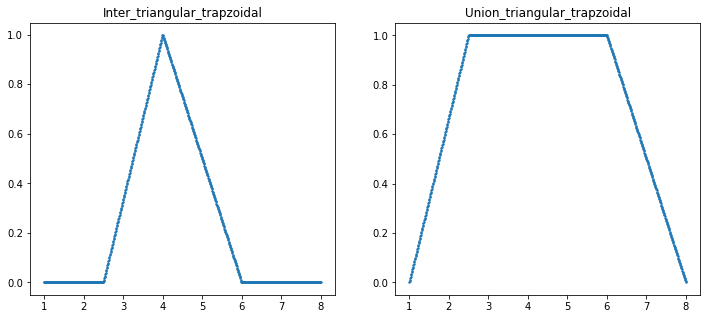

In [23]:
inter , space = intersection(t_norme_L,sef_triangular,sef_trapzoidal)
unio , space = union(t_conorme_L,sef_triangular,sef_trapzoidal)

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.title("Inter_triangular_trapzoidal")
plt.scatter(space,inter,s=2.0)

plt.subplot(122)
plt.title("Union_triangular_trapzoidal")
plt.scatter(space,unio,s=2.0)

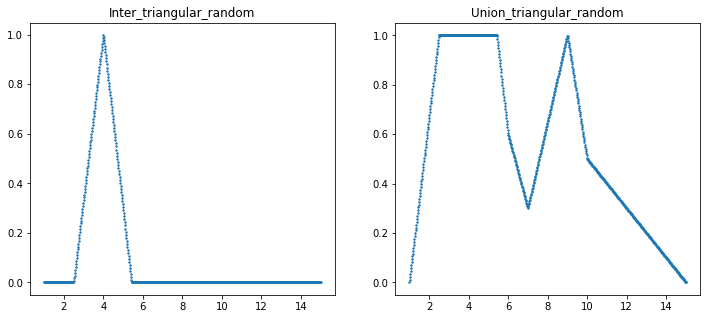

In [24]:
inter , space = intersection(t_norme_L,sef_triangular,sef_random)
unio , space = union(t_conorme_L,sef_triangular,sef_random)

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.title("Inter_triangular_random")
plt.scatter(space,inter,s=2.0)

plt.subplot(122)
plt.title("Union_triangular_random")
plt.scatter(space,unio,s=2.0)

## Propreties

### Triangular

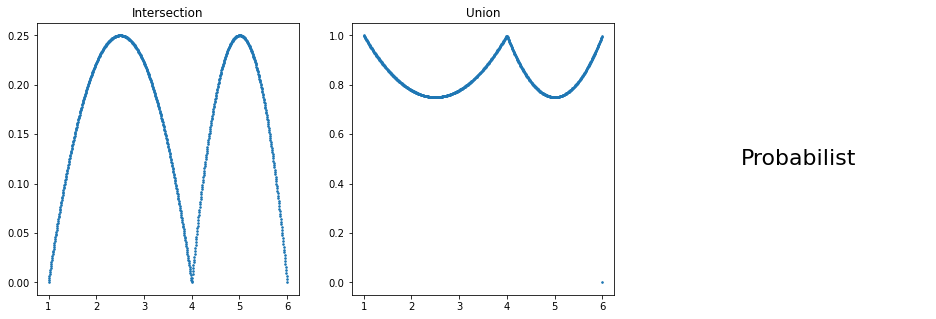

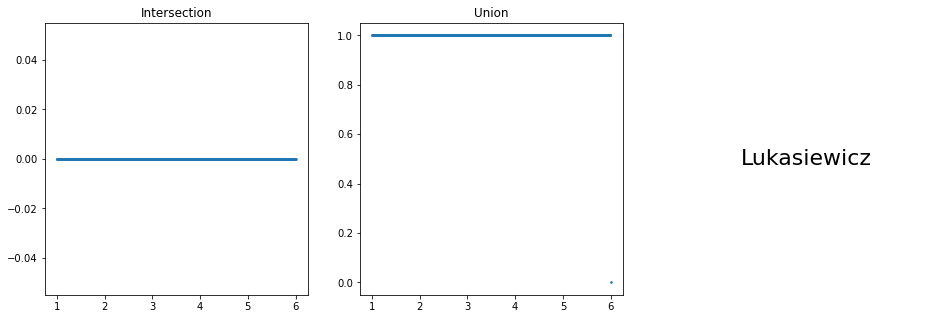

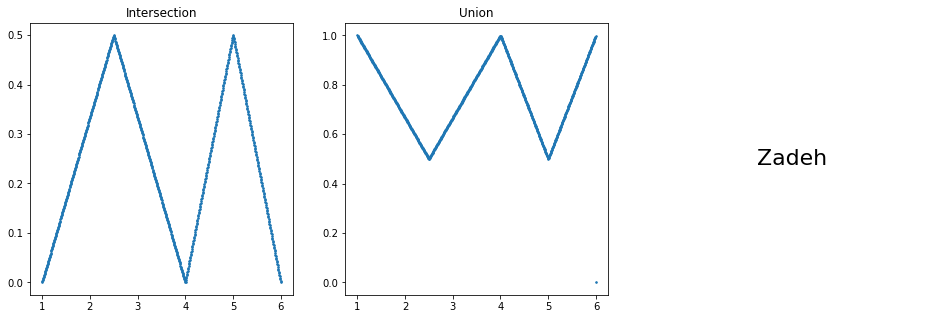

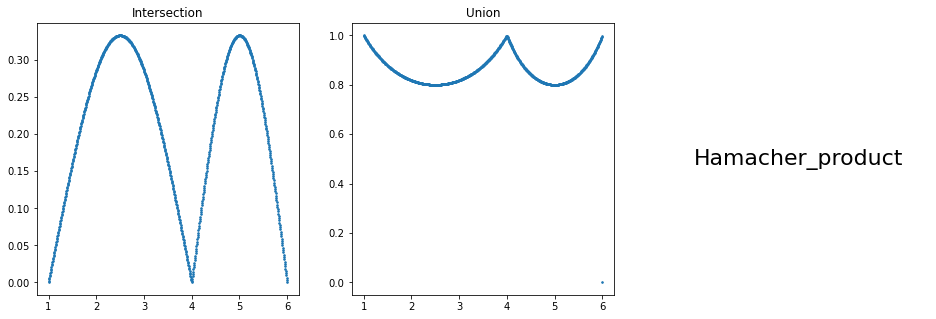

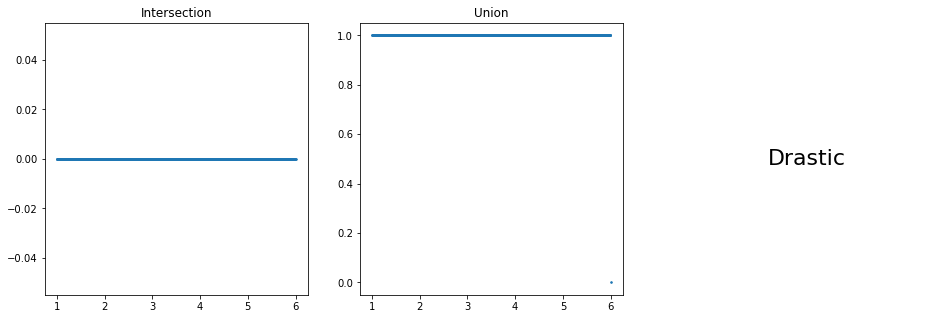

In [25]:
t_normes = [t_norme_P,t_norme_L,t_norme_Z,t_norme_H,t_norme_D]
t_conormes = [t_conorme_P,t_conorme_L,t_conorme_Z,t_conorme_H,t_conorme_D]
names = ["Probabilist","Lukasiewicz","Zadeh","Hamacher_product","Drastic"]

for i_norm in range(len(t_normes)):

    inter , space = intersection(t_normes[i_norm],sef_triangular,complementary(sef_triangular))
    unio , space = union(t_conormes[i_norm],sef_triangular,complementary(sef_triangular))

    plt.figure(figsize=(16,5))
    plt.subplot(131)
    plt.title("Intersection")
    plt.scatter(space,inter,s=2.5)

    plt.subplot(132)
    plt.title("Union")
    plt.scatter(space,unio,s=2.5)
    
    plt.subplot(133)
    plt.axis('off')
    plt.text(0.5, 0.5,names[i_norm], ha='center', va='center', fontsize=22, color='black')

### Trapzoidal

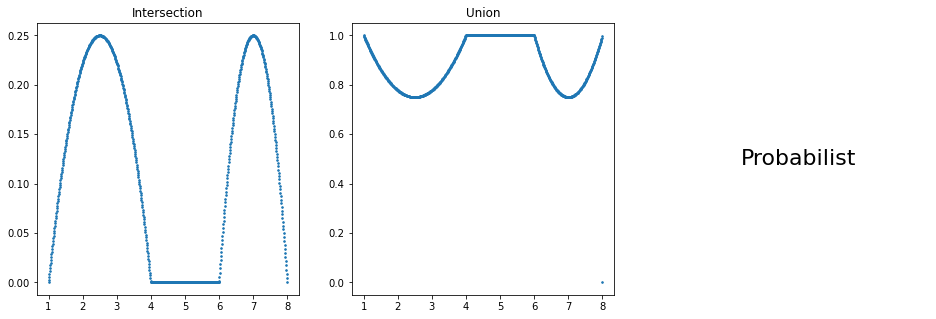

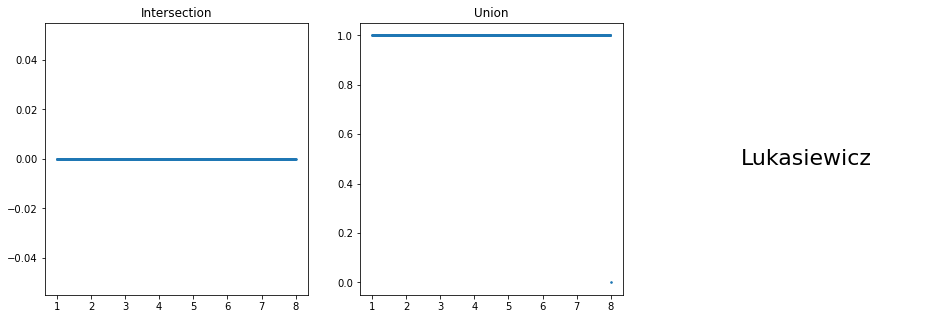

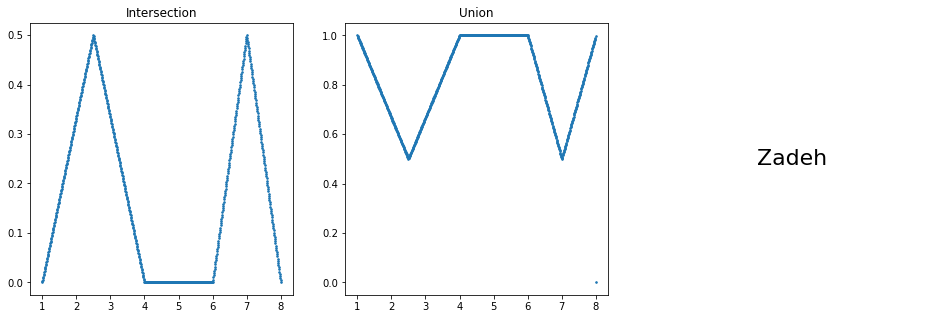

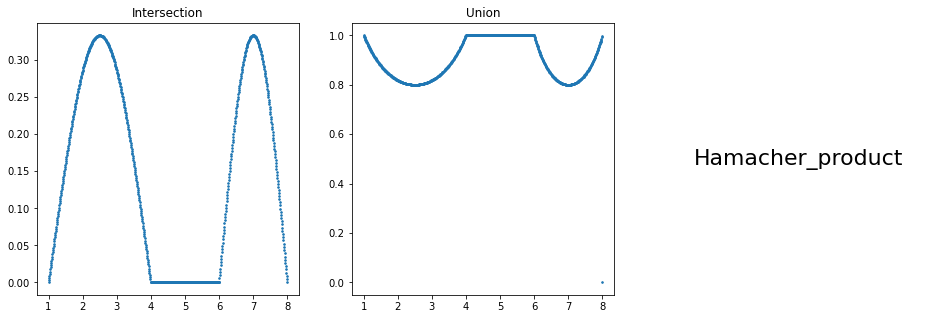

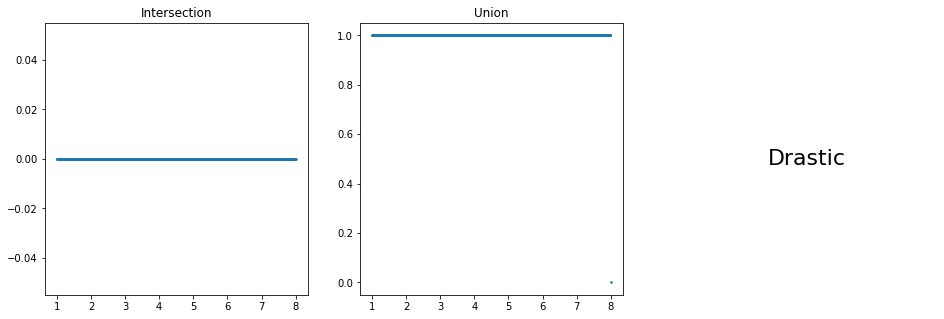

In [26]:
t_normes = [t_norme_P,t_norme_L,t_norme_Z,t_norme_H,t_norme_D]
t_conormes = [t_conorme_P,t_conorme_L,t_conorme_Z,t_conorme_H,t_conorme_D]
names = ["Probabilist","Lukasiewicz","Zadeh","Hamacher_product","Drastic"]

for i_norm in range(len(t_normes)):

    inter , space = intersection(t_normes[i_norm],sef_trapzoidal,complementary(sef_trapzoidal))
    unio , space = union(t_conormes[i_norm],sef_trapzoidal,complementary(sef_trapzoidal))

    plt.figure(figsize=(16,5))
    plt.subplot(131)
    plt.title("Intersection")
    plt.scatter(space,inter,s=2.5)

    plt.subplot(132)
    plt.title("Union")
    plt.scatter(space,unio,s=2.5)
    
    plt.subplot(133)
    plt.axis('off')
    plt.text(0.5, 0.5,names[i_norm], ha='center', va='center', fontsize=22, color='black')

### Random

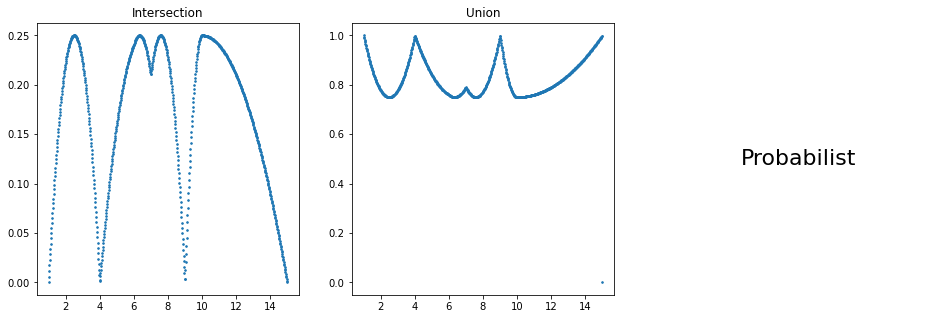

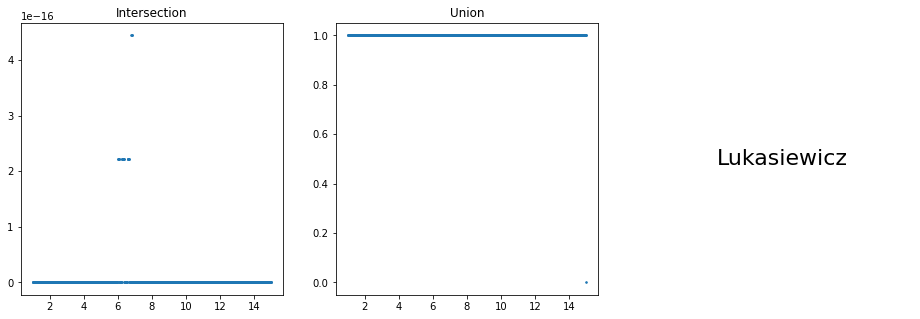

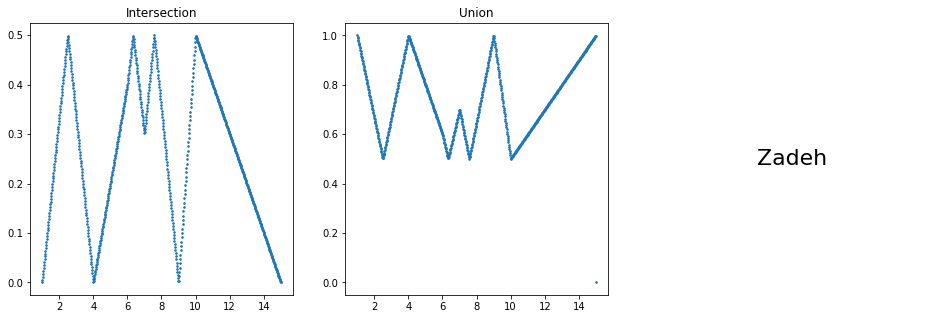

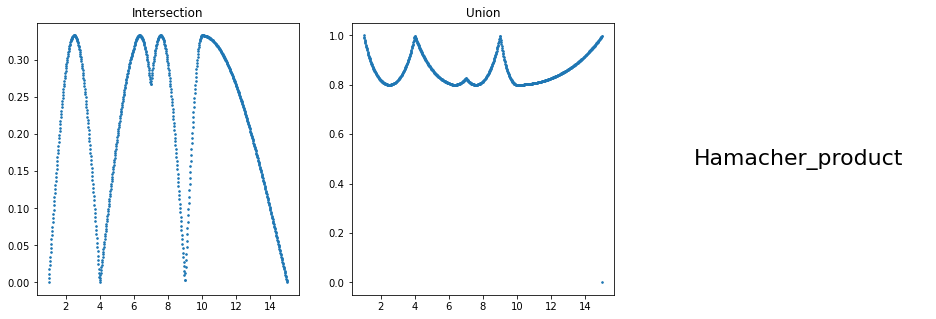

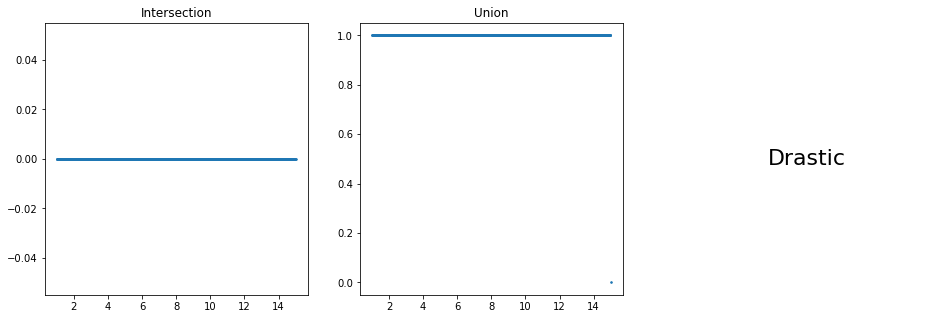

In [27]:
t_normes = [t_norme_P,t_norme_L,t_norme_Z,t_norme_H,t_norme_D]
t_conormes = [t_conorme_P,t_conorme_L,t_conorme_Z,t_conorme_H,t_conorme_D]
names = ["Probabilist","Lukasiewicz","Zadeh","Hamacher_product","Drastic"]

for i_norm in range(len(t_normes)):

    inter , space = intersection(t_normes[i_norm],sef_random,complementary(sef_random))
    unio , space = union(t_conormes[i_norm],sef_random,complementary(sef_random))

    plt.figure(figsize=(16,5))
    plt.subplot(131)
    plt.title("Intersection")
    plt.scatter(space,inter,s=2.5)

    plt.subplot(132)
    plt.title("Union")
    plt.scatter(space,unio,s=2.5)
    
    plt.subplot(133)
    plt.axis('off')
    plt.text(0.5, 0.5,names[i_norm], ha='center', va='center', fontsize=22, color='black')

## Extension

In [138]:
class Phi:
    
    def __init__(self):
        super().__init__()
        
    def calculate(self,value):
        pass
        
        
    def prevouis(self,value):
        pass

class Power(Phi):
    
    def __init__(self):
        super().__init__()
        
    def calculate(self,value):
        return value**2
    
    def prevouis(self,value):
        return [np.sqrt(value) , -np.sqrt(value)]
    
class Linear(Phi):
    
    def __init__(self):
        super().__init__()
        
    def calculate(self,value):
        return value/2 + 3
    
    def prevouis(self,value):
        return [2*value + 6]
    
class ExpLog(Phi):
    
    def __init__(self):
        super().__init__()
        
    def calculate(self,value):
        return np.exp(value)
    
    def prevouis(self,value):
        return [np.log(value)]
    
    
def compute(liste_points,sef_A):
    res = []
    for point in liste_points:
        res.append(point_membership(sef_triangular,point))
        
    return np.array(res)

def extension(sef_A , phi):
    
    image_phi_A = []
    
    born_inf , born_sup = np.min(sef_A[:,0]) , np.max(sef_A[:,0])
    
    space = np.linspace(born_inf,born_sup,NB_POINTS)
    
    for point in space:

        liste_prevouis = phi.prevouis(point)
        
        if len(liste_prevouis) == 0:
            image_phi_A.append(0)
        else:
            degree_A = compute(liste_prevouis,sef_A)
            #image_phi_A.append(np.max(degree_A))
            image_phi_A.append(liste_prevouis[np.argmax(degree_A)])
            
    return image_phi_A , space

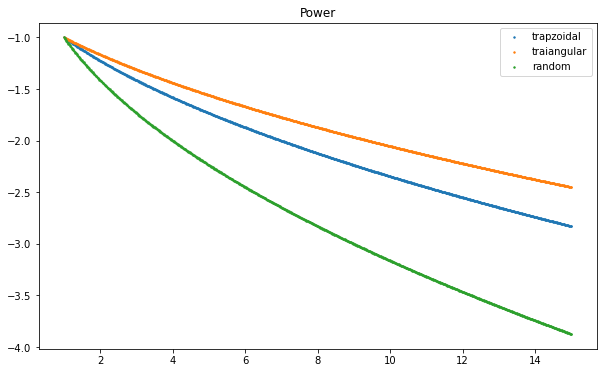

In [137]:
power = Power()

image_trapzoidal_power, space = extension(sef_trapzoidal,power)
image_traiangular_power, space = extension(sef_triangular,power)
image_random_power, space = extension(sef_random,power)


plt.figure(figsize=(10,6))
plt.scatter(space , image_trapzoidal_power,s=2.0,label="trapzoidal")
plt.scatter(space , image_traiangular_power,s=2.0,label="traiangular")
plt.scatter(space , image_random_power,s=2.0,label="random")
plt.legend()
plt.title("Power")
plt.show()

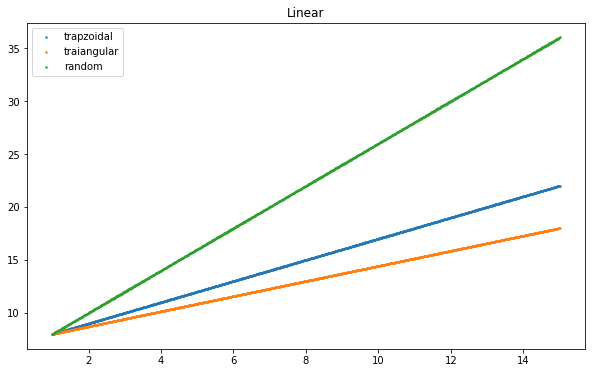

In [139]:
linear = Linear()

image_trapzoidal_linear , space = extension(sef_trapzoidal,linear)
image_traiangular_linear , space = extension(sef_triangular,linear)
image_random_linear, space = extension(sef_random,linear)


plt.figure(figsize=(10,6))
plt.scatter(space , image_trapzoidal_linear,s=2.0,label="trapzoidal")
plt.scatter(space , image_traiangular_linear,s=2.0,label="traiangular")
plt.scatter(space , image_random_linear,s=2.0,label="random")
plt.legend()
plt.title("Linear")
plt.show()

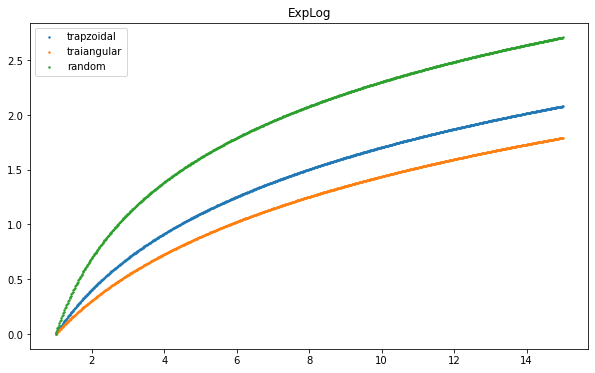

In [140]:
explog = ExpLog()

image_trapzoidal_explog, space = extension(sef_trapzoidal,explog)
image_traiangular_explog, space = extension(sef_triangular,explog)
image_random_explog, space = extension(sef_random,explog)


plt.figure(figsize=(10,6))
plt.scatter(space , image_trapzoidal_explog,s=2.0,label="trapzoidal")
plt.scatter(space , image_traiangular_explog,s=2.0,label="traiangular")
plt.scatter(space , image_random_explog,s=2.0,label="random")
plt.legend()
plt.title("ExpLog")
plt.show()